<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%203/Week_3_Infrared_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/Infrared.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


# Data describing and preprocessing

In [ ]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralM']

--- Kolom Categorikal ---
['Gender', 'Age', 'Ethnicity']

--- Kolom Numerikal ---
['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralM']


In [ ]:
# 2. Lihat 5 baris pertama untuk memahami isinya
print("Lima baris pertama dari data:")
print(df.head())

print("\n" + "="*40 + "\n")

# 3. Lihat informasi dasar (tipe data, jumlah data non-null)
print("Informasi dasar dan tipe data:")
df.info()

print("\n" + "="*40 + "\n")

# 4. Lihat ringkasan statistik untuk kolom numerik
print("Ringkasan statistik data:")
print(df.describe())

Lima baris pertama dari data:
   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33

In [ ]:
# Cek nilai yang hilang
print("\n--- Nilai Hilang ---")
print(df.isnull().sum())
print(f"Jumlah baris sebelum menangani missing values: {len(df)}")


--- Nilai Hilang ---
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64
Jumlah baris sebelum menangani missing values: 1020


In [ ]:
# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Penanganan nilai hilang pada kolom numerik dengan mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

# Penanganan nilai hilang pada kolom kategorikal dengan 'unknown'
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown')

# Cek kembali nilai yang hilang setelah penanganan
print("\n--- Nilai Hilang Setelah Penanganan ---")
print(df.isnull().sum())
print(f"Jumlah baris setelah menangani missing values: {len(df)}")


--- Nilai Hilang Setelah Penanganan ---
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64
Jumlah baris setelah menangani missing values: 1020


In [ ]:
# Cek data duplikat
print("\n--- Data Duplikat ---")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Jika ada data duplikat, Anda bisa menampilkan beberapa contoh
if not duplicate_rows.empty:
    print("\nContoh data duplikat:")
    print(duplicate_rows.head().to_markdown(index=False))

print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")


--- Data Duplikat ---
Jumlah baris duplikat: 0
Jumlah baris sebelum menghapus duplikat: 1020


In [ ]:
# Mengecek apakah ada nilai numerik di kolom kategorikal yang spesifik
print("\n--- Mengecek nilai numerik di kolom kategorikal spesifik ---")

# Daftar kolom kategorikal yang ingin diperiksa
specified_categorical_cols = categorical_cols

for col in specified_categorical_cols:
    if col in df.columns:
        # Mengecek apakah tipe data kolom adalah object atau category
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            # Mengecek apakah ada nilai yang bisa dikonversi menjadi numerik
            # Menggunakan pd.to_numeric dengan errors='coerce' akan mengganti nilai non-numerik menjadi NaN
            numeric_check = pd.to_numeric(df[col], errors='coerce')
            # Jika ada nilai yang *tidak* menjadi NaN setelah konversi, berarti ada nilai numerik
            if numeric_check.notna().any():
                print(f"Kolom '{col}': Ditemukan nilai yang bisa dikonversi menjadi numerik.")
                # Anda bisa menampilkan contoh nilai yang terpengaruh jika diinginkan
                print(df[col][numeric_check.notna()].unique())
            else:
                print(f"Kolom '{col}': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.")
        else:
            print(f"Kolom '{col}': Bukan merupakan tipe data kategorikal (object atau category).")
    else:
        print(f"Kolom '{col}': Tidak ditemukan dalam DataFrame.")


--- Mengecek nilai numerik di kolom kategorikal spesifik ---
Kolom 'Gender': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'Age': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'Ethnicity': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.


In [ ]:
# prompt: buatkan kode apabila ada nilai pada kolom kategorikal yang aneh atau tidak pada umumnya

# Fungsi untuk mengecek nilai aneh/tidak umum pada kolom kategorikal
def check_uncommon_categorical_values(df, categorical_cols):
    print("\n--- Mengecek nilai aneh/tidak umum pada kolom kategorikal ---")
    for col in categorical_cols:
        print(f"\nKolom: {col}")
        # Mendapatkan nilai unik dan hitungannya
        value_counts = df[col].value_counts()
        print(f"Jumlah nilai unik: {len(value_counts)}")
        print("Top 10 nilai unik dan hitungannya:")
        print(value_counts.head(10).to_markdown(numalign="left", stralign="left"))

        # Anda bisa menambahkan logika tambahan di sini untuk mengidentifikasi "nilai aneh"
        # Contoh: nilai yang muncul sangat jarang (frekuensi rendah)
        # Tentukan threshold frekuensi rendah, misal kurang dari 0.1% dari total data
        threshold = 0.001 * len(df)
        uncommon_values = value_counts[value_counts < threshold]

        if not uncommon_values.empty:
            print(f"\nDitemukan nilai dengan frekuensi rendah (kurang dari {threshold:.0f} baris):")
            print(uncommon_values.to_markdown(numalign="left", stralign="left"))
        else:
            print("\nTidak ditemukan nilai dengan frekuensi rendah.")

# Panggil fungsi untuk mengecek kolom kategorikal
check_uncommon_categorical_values(df, categorical_cols)

# Jika Anda ingin menangani nilai aneh ini, Anda bisa mempertimbangkan beberapa pendekatan:
# 1. Mengganti nilai aneh dengan nilai yang paling sering muncul (mode)
# 2. Mengganti nilai aneh dengan 'Other' atau 'Unknown'
# 3. Menghapus baris yang mengandung nilai aneh (hati-hati, bisa mengurangi jumlah data signifikan)
# 4. Mengelompokkan nilai aneh ke dalam kategori yang lebih besar

# Contoh penanganan: Mengganti nilai aneh dengan 'Other' jika frekuensinya di bawah threshold
def handle_uncommon_categorical_values(df, col, threshold_ratio=0.01):
    value_counts = df[col].value_counts()
    threshold = threshold_ratio * len(df)
    uncommon_values = value_counts[value_counts < threshold].index.tolist()

    if uncommon_values:
        print(f"\nMenangani nilai aneh di kolom '{col}': Mengganti {len(uncommon_values)} nilai dengan 'Other'.")
        df[col] = df[col].replace(uncommon_values, 'Other')
        print(f"Nilai unik di kolom '{col}' setelah penanganan:")
        print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))
    else:
        print(f"\nKolom '{col}': Tidak ada nilai aneh untuk ditangani dengan threshold {threshold_ratio}.")
    return df

# # Contoh penerapan penanganan (opsional, jalankan jika Anda ingin menangani nilai aneh)
# # Tentukan threshold_ratio yang sesuai
# threshold_ratio_for_handling = 0.01
# for col in categorical_cols:
#      df = handle_uncommon_categorical_values(df, col, threshold_ratio=threshold_ratio_for_handling)




--- Mengecek nilai aneh/tidak umum pada kolom kategorikal ---

Kolom: Gender
Jumlah nilai unik: 2
Top 10 nilai unik dan hitungannya:
| Gender   | count   |
|:---------|:--------|
| Female   | 606     |
| Male     | 414     |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: Age
Jumlah nilai unik: 8
Top 10 nilai unik dan hitungannya:
| Age   | count   |
|:------|:--------|
| 18-20 | 534     |
| 21-25 | 355     |
| 26-30 | 67      |
| 31-40 | 31      |
| 51-60 | 11      |
| 21-30 | 10      |
| 41-50 | 9       |
| >60   | 3       |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: Ethnicity
Jumlah nilai unik: 6
Top 10 nilai unik dan hitungannya:
| Ethnicity                         | count   |
|:----------------------------------|:--------|
| White                             | 506     |
| Asian                             | 260     |
| Black or African-American         | 143     |
| Hispanic/Latino                   | 57      |
| Multiracial                       | 50      |


In [ ]:
print("\n--- Mengecek nilai kategorikal pada kolom numerik ---")

# Daftar kolom numerik yang ingin diperiksa
specified_numerical_cols = numerical_cols

for col in specified_numerical_cols:
    if col in df.columns:
        # Mengecek apakah tipe data kolom adalah numerik (int, float)
        if pd.api.types.is_numeric_dtype(df[col]):
            # Menggunakan pd.to_numeric dengan errors='coerce' untuk mengidentifikasi nilai non-numerik
            # Nilai yang tidak bisa dikonversi menjadi numerik akan menjadi NaN
            numeric_check = pd.to_numeric(df[col], errors='coerce')

            # Menemukan nilai-nilai asli di kolom df[col] di mana numeric_check adalah NaN
            non_numeric_values = df[col][numeric_check.isna()].unique()

            if len(non_numeric_values) > 0:
                print(f"Kolom '{col}': Ditemukan nilai non-numerik (kategorikal/string):")
                print(non_numeric_values)
            else:
                print(f"Kolom '{col}': Tidak ditemukan nilai non-numerik.")
        else:
            print(f"Kolom '{col}': Bukan merupakan tipe data numerik.")
    else:
        print(f"Kolom '{col}': Tidak ditemukan dalam DataFrame.")



--- Mengecek nilai kategorikal pada kolom numerik ---
Kolom 'T_atm': Tidak ditemukan nilai non-numerik.
Kolom 'Humidity': Tidak ditemukan nilai non-numerik.
Kolom 'Distance': Tidak ditemukan nilai non-numerik.
Kolom 'T_offset1': Tidak ditemukan nilai non-numerik.
Kolom 'Max1R13_1': Tidak ditemukan nilai non-numerik.
Kolom 'Max1L13_1': Tidak ditemukan nilai non-numerik.
Kolom 'aveAllR13_1': Tidak ditemukan nilai non-numerik.
Kolom 'aveAllL13_1': Tidak ditemukan nilai non-numerik.
Kolom 'T_RC1': Tidak ditemukan nilai non-numerik.
Kolom 'T_RC_Dry1': Tidak ditemukan nilai non-numerik.
Kolom 'T_RC_Wet1': Tidak ditemukan nilai non-numerik.
Kolom 'T_RC_Max1': Tidak ditemukan nilai non-numerik.
Kolom 'T_LC1': Tidak ditemukan nilai non-numerik.
Kolom 'T_LC_Dry1': Tidak ditemukan nilai non-numerik.
Kolom 'T_LC_Wet1': Tidak ditemukan nilai non-numerik.
Kolom 'T_LC_Max1': Tidak ditemukan nilai non-numerik.
Kolom 'RCC1': Tidak ditemukan nilai non-numerik.
Kolom 'LCC1': Tidak ditemukan nilai non-nu

In [ ]:
# prompt: buatkan Encoding Variabel Kategorikal

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal yang ingin di-encode
specified_categorical_cols = categorical_cols # Ganti dengan nama kolom kategorikal Anda

# Buat salinan dataframe agar tidak mengubah dataframe asli
df_encoded_only = df.copy()

# Lakukan encoding menggunakan LabelEncoder
for col in specified_categorical_cols:
    le = LabelEncoder()
    df_encoded_only[col] = le.fit_transform(df_encoded_only[col])

# Tampilkan beberapa baris pertama setelah encoding
print("\n--- Dataframe Setelah Encoding Variabel Kategorikal ---")
print(df_encoded_only.head())


--- Dataframe Setelah Encoding Variabel Kategorikal ---
   Gender  Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       1    5          5   24.0      28.0       0.8     0.7025    35.0300   
1       0    4          2   24.0      26.0       0.8     0.7800    34.5500   
2       0    2          5   24.0      26.0       0.8     0.8625    35.6525   
3       0    2          2   24.0      27.0       0.8     0.9300    35.2225   
4       1    0          5   24.0      27.0       0.8     0.8950    35.5450   

   Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  \
0    35.3775      34.4000  ...  33.4775  33.3725  33.4925  33.0025    34.5300   
1    34.5200      33.9300  ...  34.0550  33.6775  33.9700  34.0025    34.6825   
2    35.5175      34.2775  ...  34.8275  34.6475  34.8200  34.6700    35.3450   
3    35.6125      34.3850  ...  34.4225  34.6550  34.3025  34.9175    35.6025   
4    35.6650      34.9100  ...  35.1600  34.3975  34.6700  33.8275   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Menentukan Fitur (X) dan Target (y)
target_column = 'aveOralM'
if target_column not in df_encoded_only.columns:
    print(f"Error: Kolom target '{target_column}' tidak ditemukan.")
    print(f"Kolom yang tersedia: {df.columns.tolist()}")
else:
    y = df_encoded_only[target_column]
    X = df_encoded_only.drop(target_column, axis=1)

    print("✓ Fitur (X) dan Target (y) berhasil dipisahkan.")
    print(f"  - Target (y): '{target_column}'")
    print(f"  - Jumlah Fitur (X): {X.shape[1]} kolom")
    print(f"  - Jumlah Total Sampel: {df.shape[0]} baris")
    print("-" * 40)

    # 3. Membagi Data menjadi Data Latih dan Data Uji
    # Menggunakan stratify untuk menjaga proporsi kelas, penting untuk klasifikasi.
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print("✓ Data berhasil dibagi (80% latih, 20% uji) menggunakan stratify.")
    except ValueError:
        print("Peringatan: Gagal menggunakan 'stratify'. Mungkin karena beberapa kelas hanya punya 1 anggota.")
        print("Mencoba membagi data tanpa 'stratify'...")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        print("✓ Data berhasil dibagi (80% latih, 20% uji) tanpa stratify.")

    print(f"  - Ukuran X_train: {X_train.shape}")
    print(f"  - Ukuran X_test:  {X_test.shape}")
    print("-" * 40)

    # 4. Penskalaan Fitur (Feature Scaling)
    scaler = StandardScaler()

    # Latih scaler HANYA pada data latih (X_train) untuk menghindari kebocoran data
    X_train_scaled = scaler.fit_transform(X_train)

    # Gunakan scaler yang sudah dilatih untuk mengubah data uji (X_test)
    X_test_scaled = scaler.transform(X_test)

    print("✓ Penskalaan fitur berhasil.")
    print("  - Variabel 'X_train_scaled' dan 'X_test_scaled' telah dibuat.")
    print("-" * 40)

    print("🎉 PREPROCESSING SELESAI 🎉")
    print("Data Anda sekarang siap untuk pemodelan.")




✓ Fitur (X) dan Target (y) berhasil dipisahkan.
  - Target (y): 'aveOralM'
  - Jumlah Fitur (X): 33 kolom
  - Jumlah Total Sampel: 1020 baris
----------------------------------------
Peringatan: Gagal menggunakan 'stratify'. Mungkin karena beberapa kelas hanya punya 1 anggota.
Mencoba membagi data tanpa 'stratify'...
✓ Data berhasil dibagi (80% latih, 20% uji) tanpa stratify.
  - Ukuran X_train: (816, 33)
  - Ukuran X_test:  (204, 33)
----------------------------------------
✓ Penskalaan fitur berhasil.
  - Variabel 'X_train_scaled' dan 'X_test_scaled' telah dibuat.
----------------------------------------
🎉 PREPROCESSING SELESAI 🎉
Data Anda sekarang siap untuk pemodelan.


# Machine Learning

In [ ]:
# Import library yang diperlukan untuk REGRESI
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================================
# 1. Model K-Nearest Neighbors (K-NN) Regressor
# ===================================================================
print("⚙️ Memulai Pelatihan Model K-NN Regressor...")

# Inisialisasi model regresi
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Melatih model menggunakan data latih yang SUDAH DISKALAKAN
knn_regressor.fit(X_train_scaled, y_train)
print("✓ Model K-NN Regressor berhasil dilatih.")

# Membuat prediksi pada data uji yang SUDAH DISKALAKAN
y_pred_knn = knn_regressor.predict(X_test_scaled)
print("✓ Prediksi pada data uji telah dibuat.")
print("\n--- Hasil Evaluasi K-NN Regressor ---")

# Menghitung dan menampilkan metrik evaluasi regresi
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"R-squared (R2) Score: {r2_knn:.4f}")


print("\n" + "="*50 + "\n")


⚙️ Memulai Pelatihan Model K-NN Regressor...
✓ Model K-NN Regressor berhasil dilatih.
✓ Prediksi pada data uji telah dibuat.

--- Hasil Evaluasi K-NN Regressor ---
Mean Absolute Error (MAE): 0.2029
Mean Squared Error (MSE): 0.0656
R-squared (R2) Score: 0.6885




🌳 Memulai Pelatihan Model Decision Tree Regressor...
✓ Model Decision Tree Regressor berhasil dilatih.
✓ Prediksi pada data uji telah dibuat.

--- Hasil Evaluasi Decision Tree Regressor ---
Mean Absolute Error (MAE): 0.2473
Mean Squared Error (MSE): 0.1210
R-squared (R2) Score: 0.4254


📊 Membuat visualisasi hasil prediksi...
✓ Visualisasi hasil prediksi disimpan sebagai 'regression_prediction_results.png'


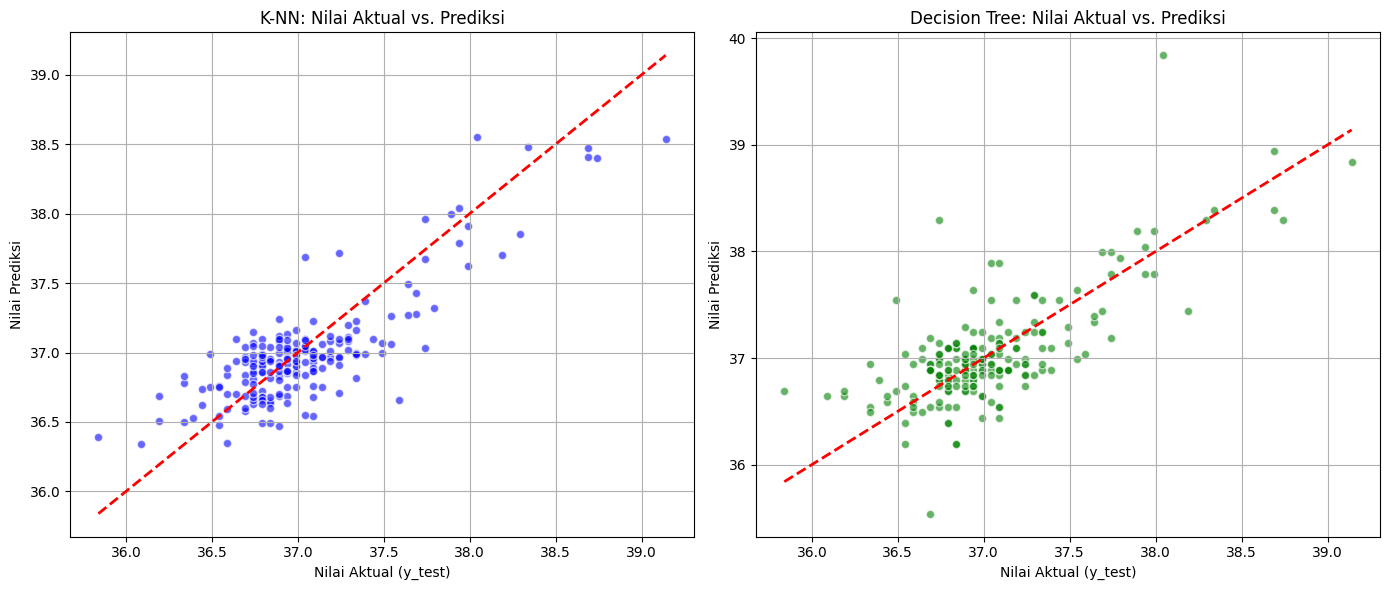

In [ ]:
#===================================================================
# 2. Model Decision Tree Regressor
# ===================================================================
print("🌳 Memulai Pelatihan Model Decision Tree Regressor...")

# Inisialisasi model regresi
dt_regressor = DecisionTreeRegressor(random_state=42)

# Melatih model menggunakan data latih ASLI (tanpa penskalaan)
dt_regressor.fit(X_train, y_train)
print("✓ Model Decision Tree Regressor berhasil dilatih.")

# Membuat prediksi pada data uji ASLI
y_pred_dt = dt_regressor.predict(X_test)
print("✓ Prediksi pada data uji telah dibuat.")
print("\n--- Hasil Evaluasi Decision Tree Regressor ---")

# Menghitung dan menampilkan metrik evaluasi regresi
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"R-squared (R2) Score: {r2_dt:.4f}")


print("\n" + "="*50 + "\n")


# ===================================================================
# 3. Visualisasi Hasil Prediksi
# ===================================================================
print("📊 Membuat visualisasi hasil prediksi...")

plt.figure(figsize=(14, 6))

# Plot untuk K-NN Regressor
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.6, color='blue', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('K-NN: Nilai Aktual vs. Prediksi')
plt.xlabel('Nilai Aktual (y_test)')
plt.ylabel('Nilai Prediksi')
plt.grid(True)

# Plot untuk Decision Tree Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='green', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Decision Tree: Nilai Aktual vs. Prediksi')
plt.xlabel('Nilai Aktual (y_test)')
plt.ylabel('Nilai Prediksi')
plt.grid(True)

plt.tight_layout()
plt.savefig('regression_prediction_results.png')
print("✓ Visualisasi hasil prediksi disimpan sebagai 'regression_prediction_results.png'")


Model K-NN Regressor adalah pilihan yang jelas lebih unggul untuk kasus ini. Dengan kemampuan menjelaskan ~69% variasi data dan tingkat kesalahan yang lebih rendah, model ini memberikan prediksi yang lebih andal untuk nilai aveOralM. Performa model Decision Tree tergolong lemah dan tidak disarankan untuk digunakan tanpa perbaikan lebih lanjut.

Tentu, mari kita bedah setiap persamaan matematika untuk metrik evaluasi yang digunakan pada model regresi Anda.

### 1. Mean Absolute Error (MAE)

MAE mengukur rata-rata dari selisih absolut (nilai mutlak) antara nilai aktual dan nilai prediksi.

**Persamaan:**
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

**Penjelasan Komponen:**

* $n$ : Jumlah total data pada data uji Anda (dalam kasus Anda, $n=204$).
* $\sum_{i=1}^{n}$ : Simbol Sigma, yang berarti "jumlahkan semua". Kita akan menjumlahkan hasil perhitungan untuk setiap data, dari data pertama ($i=1$) hingga data terakhir ($i=n$).
* $y_i$ : Nilai **aktual** (nilai sebenarnya) dari data ke-i. Ini adalah nilai `aveOralM` yang ada di dataset Anda.
* $\hat{y}_i$ : Nilai **prediksi** (hasil tebakan model) untuk data ke-i.
* $|y_i - \hat{y}_i|$ : Selisih antara nilai aktual dan prediksi. Tanda `|...|` berarti nilai absolut (absolut), jadi hasilnya selalu positif. Ini penting agar kesalahan positif dan negatif tidak saling menghilangkan.

**Analogi Sederhana:**
Bayangkan Anda mencoba menebak umur 5 orang teman. Umur sebenarnya ($y_i$) dan tebakan Anda ($\hat{y}_i$) adalah:

| Teman | Umur Sebenarnya ($y_i$) | Tebakan Anda ($\hat{y}_i$) | Selisih Absolut ($|y_i - \hat{y}_i|$) |
|:---|:---:|:---:|:---:|
| 1 | 25 | 27 | $|25-27| = 2$ |
| 2 | 30 | 29 | $|30-29| = 1$ |
| 3 | 22 | 25 | $|22-25| = 3$ |
| 4 | 40 | 40 | $|40-40| = 0$ |
| 5 | 35 | 31 | $|35-31| = 4$ |
|**Total**| | | **10** |

MAE adalah rata-rata dari selisih tersebut: $MAE = \frac{10}{5} = 2$. Jadi, secara rata-rata, tebakan Anda meleset 2 tahun. Semakin kecil nilai MAE, semakin baik.

---

### 2. Mean Squared Error (MSE)

MSE mirip dengan MAE, tetapi alih-alih menggunakan nilai absolut, MSE menggunakan kuadrat dari selisih.

**Persamaan:**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Penjelasan Komponen:**

* Komponen $n$, $\sum$, $y_i$, dan $\hat{y}_i$ sama seperti pada MAE.
* $(y_i - \hat{y}_i)^2$ : Selisih antara nilai aktual dan prediksi, lalu **dikuadratkan**.

**Mengapa Dikuadratkan?**
Mengkuadratkan kesalahan memiliki dua efek utama:
1.  **Membuat semua kesalahan menjadi positif.**
2.  **Memberikan "hukuman" yang jauh lebih besar untuk kesalahan yang besar.** Kesalahan sebesar 3 menjadi 9, sedangkan kesalahan sebesar 5 menjadi 25. Ini membuat MSE sangat sensitif terhadap prediksi yang sangat jauh meleset (outlier).

MSE berguna jika Anda ingin model Anda menghindari kesalahan besar sama sekali.

---

### 3. R-squared ($R^2$) atau Koefisien Determinasi

$R^2$ adalah metrik yang paling sering digunakan untuk regresi. Ia mengukur seberapa besar persentase variasi dari variabel target (`aveOralM`) yang dapat dijelaskan oleh fitur-fitur (input) pada model Anda.

**Persamaan:**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

**Penjelasan Komponen:**

Metrik ini membandingkan "kesalahan model Anda" dengan "kesalahan model sederhana yang hanya menebak nilai rata-rata".

* **Bagian Atas (Numerator):** $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
    * Ini adalah jumlah dari kuadrat kesalahan **model Anda**. Ini disebut *Sum of Squared Errors* (SSE). Ini mengukur seberapa banyak variasi yang **tidak bisa** dijelaskan oleh model Anda.

* **Bagian Bawah (Denominator):** $\sum_{i=1}^{n} (y_i - \bar{y})^2$
    * $\bar{y}$ (baca: y-bar) adalah **nilai rata-rata** dari semua nilai $y_i$ aktual.
    * Ini adalah jumlah dari kuadrat kesalahan yang akan Anda dapatkan jika Anda menggunakan model yang sangat bodoh, yang selalu menebak nilai rata-rata untuk semua data. Ini disebut *Total Sum of Squares* (SST) dan merepresentasikan **total variasi** dalam data.

* **Pembagian dan Pengurangan:** $\frac{SSE}{SST}$ adalah fraksi variasi yang **gagal** dijelaskan oleh model Anda. Dengan menghitung $1 - \frac{SSE}{SST}$, kita mendapatkan fraksi variasi yang **berhasil** dijelaskan oleh model.

**Interpretasi Nilai $R^2$:**
* **$R^2 = 1$:** Prediksi sempurna. Model Anda berhasil menjelaskan 100% variasi data.
* **$R^2 = 0.6885$ (Hasil K-NN Anda):** Model K-NN Anda mampu menjelaskan sekitar **68.85%** dari total variasi nilai `aveOralM`. Sisa ~31% dijelaskan oleh faktor lain yang tidak ada dalam model.
* **$R^2 = 0$:** Model Anda tidak lebih baik daripada sekadar menebak nilai rata-rata.
* **$R^2 < 0$:** Model Anda lebih buruk daripada menebak nilai rata-rata (sangat jarang terjadi pada data uji yang wajar).